# Проект: "Исследование компьютерных игр" #

**Описание проекта:**

 Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

 Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель проекта:**
    
Необходимо выявить закономерности, определяющие успешность той или иной компьютерной игры.

**Этапы выполнения данного проекта:**

1. Изучение общей информации о данных

2. Предобработка данных и расчет дополнительных значений

3. Исследовательский анализ данных

4. Составление портрета пользователя по каждому региону

5. Проверка гипотез

6. Общий вывод по проекту

**Расположение данных:**

Путь к файлу: /datasets/games.csv

**Описание данных:**    
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Изучение общей информации о данных ###

Импортируем все необходимые для данного исследования библиотеки.

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')


Откроем датасет и выведем первые 10 строчек для визуального осмотра, а также посмотрим на информацию о данном датасете.

In [2]:
# открываем и сохраняем датасет через конструкцию try/except
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\datasets\games.csv')

In [3]:
# выводим первые 10 строк датасета
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


При визуальном осмотре таблицы можно заметить наличие пропусков  в таких столбцах, как `Critic_Score`, `User_Score` и `Rating`. Также бросается в глаза несоответствие формата в столбце `Year_of_Release`. Ну и еще можно отметить, что названия столбцов не соответствуют змеиному регистру.

In [4]:
# выводим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из предоставленной выше информации мы видим, что в таблице 16715 строк и 11 столбцов.

Также мы видим наличие проспусков и в других столбцах помимо тех, которые мы выявили при визуальном осмотре. Пропущенные значения присутствуют еще столбцах `Name`, `Year_of_Release` и `Genre`, хотя нужно отметить, что количество пропусков в них очень небольшое.

Еще в столбцах `Critic_Score` и `User_Score`, также как и в `Year_of_Release` не соответствует формат значений.

**Итог данного этапа:**

На данном этапе было сделано следующее:

  - произведена загрузка датасета
  - выведено 10 строчек датасета для визуального осмотра
  - выведена и изучена общая информация о датасете
  - найдены пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`
  - выявлено несоответствие названий столбцов змеиному регистру
  - выявлено несоответствие типов значений в столбцах `Critic_Score`, `User_Score` и `Year_of_Release`

### Предобработка данных и расчет дополнительных значений ###

#### Предобработка данных ####

Начнем предобработку даннных с изменения названий столбцов. Для этого достаточно привести названия столбцов к нижнему регистру.

In [5]:
# используя метод str.lower() приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Далее посмотрим на количество пропусков и наличие явных дубликатов в датафрейме.

In [6]:
# используем методы isna и sum для вывода количества пропущенных значений
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# используем методы duplicated и sum для вывода количества явных дубликатов
data.duplicated().sum()

0

Видим что пропуски в столбце `critic_score` составляют чуть больше 50% от всех значений, а в столбцах `user_score` и `rating` примерно по 40% в каждом. В остальных трех столбцах пропуски незначительные.

Проверка на явные дубликаты показала, что в данном датафрейме они отсутствуют.

Для начала разберемся со столбцами, где присутствует незначительное количество пропусков.

Выведем на экран строки с пропусками в столбцах `name` и `genre`.

In [8]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data[data.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим, что два пропущенных значения в столбце `name` и `genre` находятся в одних и тех же строках. Также в этих строках пропущены значения и в других столбцах. Поэтому эти строки можно удалить т.к. их всего две и в них нет полезной информации.

In [10]:
# используем метод dropna, чтобы удалить пропуски и reset index, чтобы обновить индексацию
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

Посмотрим на пропуски в столбце `year_of_release`:

In [11]:
data[data.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Из таблицы видно, что пропуски в столбце `year_of_release` не зависят от вида жанра или типа платформы, исходя из этого можно предположить, что причиной пропусков могут быть сбои при выгрузке данных или другие технические причины.

Теперь посмотрим зависят ли пропуски в столбцах `critic_score`, `user_score` и `rating` от года выпуска игры. Возможно, что для более старых игр могла отсутствовать информация об оценках пользователей и критиков, а также рейтинг ESRB.

In [12]:
# с помощью метода sort_values отсоритуем столбец по годам
data.sort_values(by='year_of_release').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1763,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1967,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6299,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
5359,Freeway,2600,1980.0,Action,0.32,0.02,0.0,0.00,NaN,NaN,NaN
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN
4018,Ice Hockey,2600,1980.0,Sports,0.46,0.03,0.0,0.01,NaN,NaN,NaN
6874,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN
2649,Boxing,2600,1980.0,Fighting,0.72,0.04,0.0,0.01,NaN,NaN,NaN
3393,BurgerTime,2600,1981.0,Puzzle,0.55,0.03,0.0,0.01,NaN,NaN,NaN


Как видим такая взаимосвязь действительно есть. Поэтому причиной пропусков в этих трех столбцах, помимо технических причин, является то, что для старых игр просто отсутствовала эта информация.

Так как некоторые игры, которые имеют пропуски в столбцах `year_of_release`, `critic_score` и `user_score`, могли выходить и на других платформах, а также учитывая, что разница в этих значениях на остальных платформах если и есть, то очень незначительная, то можно попробовать заполнить пропуски медианой этих значений на всех остальных платформах.

Но сначала разберемся со столбцом `user_score`. Этот столбец имеет неправильный тип данных, а также в нем среди оценок пользователей присутствует значение **tbd**.

TBD - аббревиатура от английского **To Be Determined** (будет определено) или **To Be Decided** (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть в нашем случае это означает, что игра на данный момент еще не имеет рейтинга, поэтому эти значения можно заменить на NaN.

In [13]:
# с помощью метода pd.to_numeric изменим тип значений и включим принудительную замену всех нечисловых значений на NAN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Можно еще привести значения столбца `user_score` к такому же виду как и в `critic_score` для удобства сравнения.

In [14]:
data['user_score'] = data['user_score'] * 10

Теперь приступим непосредственно к замене пропусков в столбцах `year_of_release`, `critic_score` и `user_score`.

In [15]:
# создаем список с названиями нужных столбцов
cols_for_fillna = ['year_of_release', 'critic_score', 'user_score']
# с помощью цикла и условия проходимся по каждому столбцу из списка
# группируем датафрейм по 'name' считаем медианну значений в нужном столбце для каждой игры и заполняем ею пропуски
for col in data.columns:
    if col in cols_for_fillna:
        data[col] = data[col].fillna(
            data.groupby(['name'])[col].transform('median'))

Посмотрим сколько теперь осталось пропусков в этих столбцах.

In [16]:
# используем методы isna и sum для вывода количества пропущенных значений
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         8024
rating             6764
dtype: int64

Пропущенных значений в столбцах `critic_score` и `user_score` все еще очень много, но т.к. мы выяснили, что большинство из этих пропусков присутствуют в старых играх, то скорее всего данные значения нам не понадобятся для исследования. Поэтому оставим их как есть.

Приведем тип значений в столбцах `critic_score` и `user_score`, а также в `year_of_release` к целочисленному. Но перед этим заменим все оставшиеся в них пропуски на -1.

In [17]:
# с помощью метода fillna() заменяем пропуски в столбцах на -1
data = data.fillna({ 'year_of_release': "-1", 'critic_score': "-1", 'user_score': "-1"})

In [18]:
# с помощью метода astype() меняем тип значений в столбцах на целочисленный
data = data.astype({ 'year_of_release': "int64", 'critic_score': "int64", 'user_score': "int64"})

Теперь рассмотрим столбец `rating`. Выведем уникальные значения этого столбца.

In [19]:
# используя метод unique() выведем список уникальных значений
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В этом столбце присутствуют значения рейтинга компьютерных игр выданного ESRB.

**ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Согласно информации из оффициального сайта  ESRB:

**"E10+" ("Everyone 10+")** - контент от 10 лет и выше

**"EC" ("Early Childhood")** - контент для детей младшего возраста

**"E" ("Everyone")** - контент для всех

**"M" ("Mature")** - контент от 17 лет и выше

**"T" ("Teen")** - контент от 13 лет и выше

**"K-A" ("Kids to Adults")** - контент для всех (старое обозначение рейтинга "E")

**"AO" ("Adults Only")** - контент для взрослых

**"RP" ("Rating Pending")** - рейтинг ожидается

Так как категория **"EC"** входит в категорию **"E"**, то можно **"EC"** заменить на **"E"**. Также заменим **"K-A"** на **"E"**, потому что это одна и та же категория.

In [20]:
# используем метод replace для замены значений
data['rating'] = data['rating'].replace({'EC':'E', 'K-A':'E'})

Далее перейдем к пропускам в столбце `rating`. Заменим пропущенные значения для игр, которые представлены на нескольких платформах, т.к. рейтинг для одной и той же игры будет одинаковым на всех платформах.

In [21]:
# группируем датафрейм по 'name' и заполняем пропуск первым попавшимся значением для конкретной игры на других платформах
data['rating'] = data['rating'].fillna(data.groupby(['name'])['rating'].transform('first'))

Оставшиеся пропуски можно заменить на значение "Рейтинг Неизвестен".

In [22]:
data['rating'] = data['rating'].fillna('Unknown')

В конце посмотрим на общее количество пропусков после всех преобразований.

In [23]:
# используем методы isna и sum для вывода количества пропущенных значений
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Расчет дополнительных значений ####

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Выведем на экран датафрейм и информацию о нем.

In [25]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1,Unknown,28.31


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


**Итог данного этапа:**

На данном этапе было сделано следующее:

- приведены к нижнему регистру названия столбцов
- обработаны или удалены пропуски:
  - в столбцах `name` и `genre` пропуски были удалены, т.к. всего их было 2 значения 
  - вероятной причиной пропусков в данных столбцах может быть технический сбой при выгрузке датасета
  - в столбцах `year_of_release`, `critic_score`, `user_score` и `rating` пропуски заменены медианным значением этой же игры на других платформах, а в случае с рейтингом на первое значение.
  - вероятной причиной пропусков в `year_of_release` может быть технический сбой при выгрузке датасета, а в остальных трех столбцах помимо технических причин, может быть и то, что для более старых игр просто отсутствовала эта информация.
  - в столбце `rating` некоторое количество пропусков было заменено на значение рейтинга, характерного для игр с тем же жанром
  - оставшиеся пропуски в числовых столбцах были заменены на -1 в целях преобразования типов данных в этих столбцах
  - оставшиеся пропуски в столбце с рейтингом были заменены на "Unknown"
- заменен тип данных в столбцах `year_of_release`, `critic_score` и `user_score` на целочисленный
- добавлен новый столбец с общим количеством продаж по всем регионам


### Исследовательский анализ данных ###

#### Исследование количества выпущенных игр в разные годы ####

Посмотрим сколько игр выпускалось в разные годы.

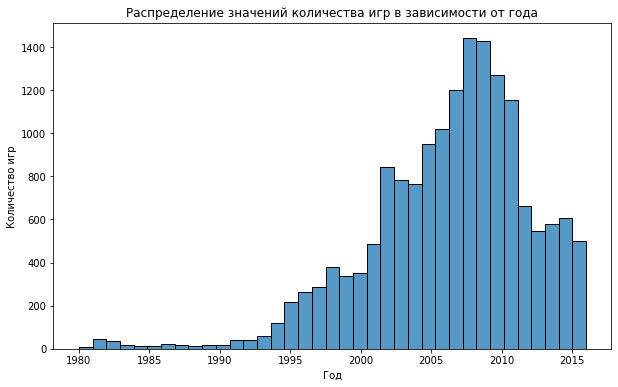

In [27]:
# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью sns.histplot выводим гистограмму количества игр в зависимости от года

sns.histplot(
    # методом qwery отфильтровываем датасет от значений -1 и выбираем необходимые столбцы для графика
    data.query('year_of_release > 0')[['year_of_release', 'name']],
    x = 'year_of_release',
    bins = 37
)

# выбираем оформление графика
plt.title("Распределение значений количества игр в зависимости от года");
plt.xlabel('Год');
plt.ylabel('Количество игр');

Исходя из информации на графике можно сделать следующие выводы:

- c 80 по 90 года было выпущено крайне мало компьютерных игр, вероятно в то время происходило зарождение игровой индустрии
- с 90 по 00 года присутствует плавный рост количества выпускаемых игр, т.е. происходило постепенное развитие игровой индустрии
- с 00 по 10 года присутсувует наиболее существенный рост количества выпускаемых игр, в это время игровая индустрия достигла пика своего развития, по крайне в плане общего количества выпускаемых игр, после которого начался спад вплоть до 2016 года

Вероятными причинами падения количества выпускаемых игр после 2010 года могли являтся:

 - последствие мирового финансового кризиса конца 2008 года (многие компании по разработке игр могли обанкротиться или сократить штат сотрудников, что негативно сказалось на количестве выпускаемых игр)
 
 
 - стремительное развитие мобильного гейминга (многие компании могли сосредоточить свою деятельность на этом направлении и выпускать игры преимущественно на мобильные устройства)
 
 
 - увеличение количества времени, а также стоимости разработки отдельной компьютерной игры, в связи с чем компании не могли выпускать то же количество игр, что и раньше
 
Для нашего дальнейшего исследования нам будет достаточно данных за 2014-2016 год, т.к. они лучше всего отражают актуальные тенденции в игровой индустрии на текущий момент времени.

#### Исследование популярности игровых платформ ####

После того как мы определили интересующий нас период времени нам надо отбрать наиболее актуальные платформы для этого периода.

Для начала определим платформы с наибольшими сумарными продажами за все время.

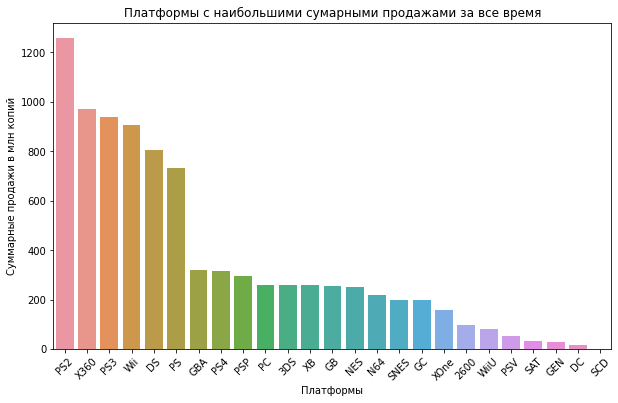

In [28]:
# устанавливаем цвет для графиков
sns.set_palette("husl")

# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью метода  sns.barplot строим график самых популярных платформ за все время
sns.barplot(
    x = 'platform', 
    y = "total_sales",
    # группируем датасет по платформам, сбрасываем индекс, считаем общую сумму продаж в total_sales по каждой платформе
    # отсортировываем это все по убыванию и выводим 25 самых популярных платформ
    data = data.groupby('platform', as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False).head(25)
)

# выбираем оформление графика
plt.xlabel('Платформы');
plt.ylabel('Суммарные продажи в млн копий');
plt.title('Платформы с наибольшими сумарными продажами за все время');
plt.xticks(rotation=45);

Как видно из графика топ 5 самых популярных платформ распределились следующим образом:
- 1 место Sony Playstation 2 с результатом примерно в 1.25 млрд проданных копий
- 2 место XBOX 360 с результатом примерно в 975 млн проданных копий
- 3 место Sony Playstation 3 с результатом примерно в 950 млн проданных копий
- 4 место Nintendo Wii с результатом примерно в 900 млн проданных копий
- 5 место Nintendo DS с результатом примерно в 800 млн проданных копий

На основе этих пяти самых популярных платформ построим график распределения продаж по годам, тем самым приблизительно определим жизненный цикл популярных игровых платформ.

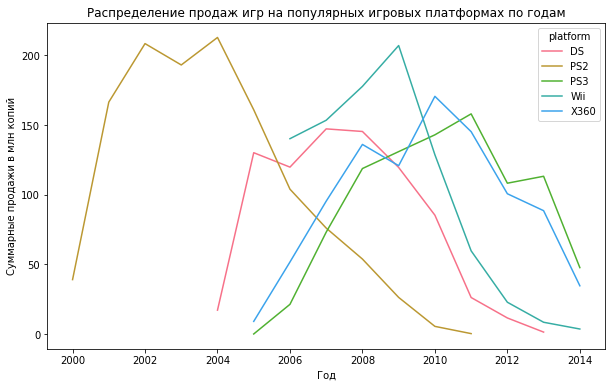

In [29]:
# создаем список с пятью самыми популярными платформами
most_popular_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью метода  sns.lineplot строим график продаж на самых популярных платформах
sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    # методом query выбираем необходимый период времени и платформы, 
    # группируем данные по платформам и году релиза игр, сбрасываем индекс,
    # считаем суммарные продажи игр за каждый год по каждой платформе
    data=data.query(
        '2000 <= year_of_release < 2015 and platform in @most_popular_platform').groupby(
        ['platform','year_of_release'], as_index = False)['total_sales'].sum()
)

# выбираем оформление графика
plt.xlabel('Год');
plt.ylabel('Суммарные продажи в млн копий');
plt.title('Распределение продаж игр на популярных игровых платформах по годам');

На этом графике мы видим следующее:

- жизенный цикл платформы PlayStation 2 приходится на отрезок с 2000 по 2010 год (с пиком популярности в 2002 - 2004 годах)
- жизенный цикл платформы XBOX360 приходится на отрезок с 2005 по 2015 год (с пиком популярности в 2010 году)
- жизенный цикл платформы PlayStation 3 приходится на отрезок с 2006 по 2016 год (с пиком популярности в 2011 году)
- жизенный цикл платформы Nintendo Wii приходится на отрезок с 2006 по 2012 год (с пиком популярности в 2009 году)
- жизенный цикл платформы Nintendo DS приходится на отрезок с 2004 по 2011 год (с пиком популярности в 2007 году)

Исходя из этой информации мы можем сделать вывод:
 - приблизительный жизненный цикл популярных игровых платформ находится в диапазоне от 6 до 10 лет
 - приблизительный пик популярности игровых платформ достигается через 3 - 5 лет после даты выхода платформы

Теперь определим самые популярные платформы за 2016 год.

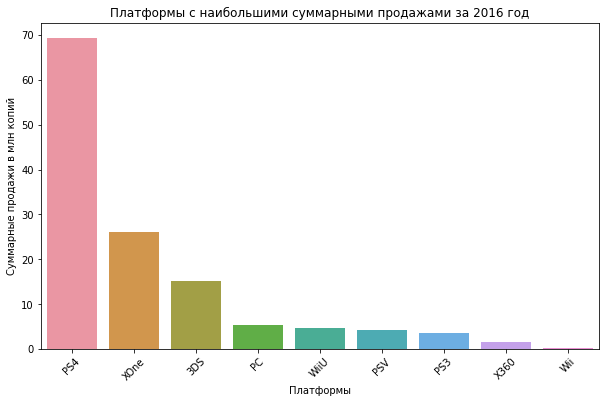

In [30]:
# выбираем размер графика
plt.figure(figsize=(10,6))
# с помощью метода  sns.barplot строим график самых популярных платформ за 2016 год
sns.barplot(
    x = 'platform', 
    y = "total_sales",
    # методом query выбираем необходимый период времени
    # группируем датасет по платформам, сбрасываем индекс, считаем общую сумму продаж в total_sales по каждой платформе
    # отсортировываем это все по убыванию и выводим 10 самых популярных платформ
    data = data.query('year_of_release == 2016').groupby(
        'platform', as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False).head(10)
)

# выбираем оформление графика
plt.xlabel('Платформы');
plt.ylabel('Суммарные продажи в млн копий');
plt.title('Платформы с наибольшими суммарными продажами за 2016 год');
plt.xticks(rotation=45);

Как видно из графика топ 5 самых популярных платформ за 2016 год распределились следующим образом:
- 1 место Sony Playstation 4 с результатом примерно в 70 млн проданных копий
- 2 место XBOX One с результатом примерно в 26 млн проданных копий
- 3 место Nintendo 3DS с результатом примерно в 15 млн проданных копий
- 4 место PC (Персональный Компьютер) с результатом примерно в 5 млн проданных копий
- 5 место Nintendo WiiU с результатом примерно в 4.5 млн проданных копий

Мы видим гиганский отрыв Sony Playstation 4 по количеству проданных игр от всех остальных игровых платформ, т.е. можно сказать, что это самая популярная платформа на 2016 год. Также довольно неплохие продажи у XBOX One и у портативной консоли Nintendo 3DS. Платформы предыдущего поколения, такие как Sony Playstation З, XBOX 360 и Nintendo Wii, которые как мы выяснили были очень успешными в прошлом, потеряли свою популярность и на данный момент сильно уступают по продажам своим более современным аналогам.

Посмотрим на динамику общих продаж всех самых популярных игровых платформ на 2016 год за период с 2010 по 2015 года (данные за 2016 год мы не берем так как они не полные и могут исказить наш график), тем самым выясним на каком этапе жизненного цикла находится каждая из этих платформ.

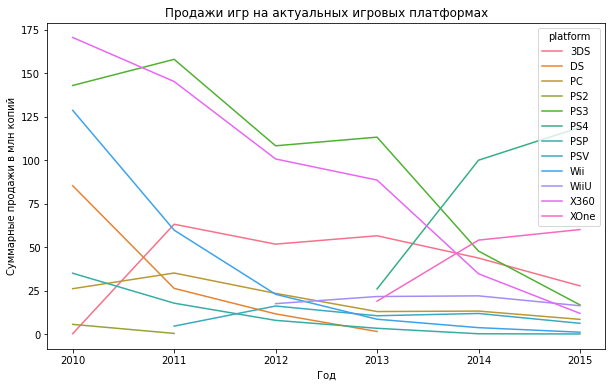

In [31]:
# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью метода  sns.lineplot строим график продаж на самых популярных платформах 2016 года
sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    # методом query выбираем необходимый период времени и платформы, 
    # группируем данные по платформам и году релиза игр, сбрасываем индекс,
    # считаем суммарные продажи игр за каждый год по каждой платформе
    data=data.query(
        '2010 <= year_of_release <= 2015').groupby(
        ['platform','year_of_release'], as_index = False)['total_sales'].sum()
)

# выбираем оформление графика
plt.title(label='Продажи игр на актуальных игровых платформах')
plt.xlabel('Год');
plt.ylabel('Суммарные продажи в млн копий');

На этом графике мы видим следующее:
- платформы Sony Playstation 4 и XBOX One появились в 2013 году и стремительно набирают свою популярность
- платформа Nintendo WiiU хоть и вышла в 2012 году но на данный момент так и не смогла стать достаточно популярной как два предыдущих ее конкурента
- портативная консоль Nintendo 3DS похоже прошла свой пик популярности и в дальнейшем скорее всего утратит свою актуальность
- отдельно стоит отметить PC, как пусть и не популярную (в плане продаж игр), но самую стабильную и не теряющую свою актуальность платформу
- все платформы предыдущего поколения растеряли за этот период свою популярность и уступили место своим более новым аналогам

Для дальнейшего исследования нам будет достаточно данных о всех самых популярных игровых платформах за последнее время.

#### Создание датасета с актуальной информацией ####

Отфильтруем датасет по интересующему нас периоду и платформам, сохраним в новую переменную и выведем на экран.

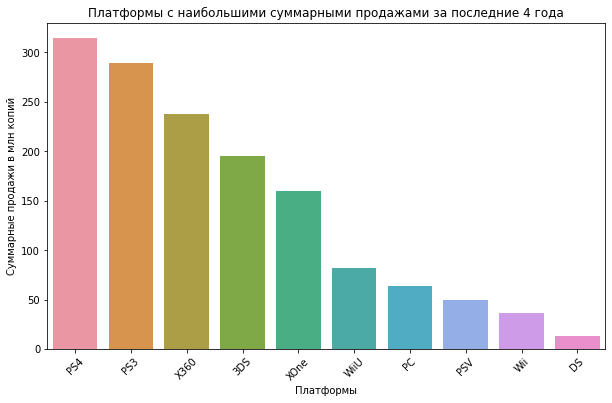

In [32]:
# выбираем размер графика
plt.figure(figsize=(10,6))
# с помощью метода  sns.barplot строим график самых популярных платформ за последние 4 года
sns.barplot(
    x = 'platform', 
    y = "total_sales",
    # методом query выбираем необходимый период времени
    # группируем датасет по платформам, сбрасываем индекс, считаем общую сумму продаж в total_sales по каждой платформе
    # отсортировываем это все по убыванию и выводим 10 самых популярных платформ
    data = data.query('2012 <= year_of_release <= 2016').groupby(
        'platform', as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False).head(10)
)

# выбираем оформление графика
plt.xlabel('Платформы');
plt.ylabel('Суммарные продажи в млн копий');
plt.title('Платформы с наибольшими суммарными продажами за последние 4 года');
plt.xticks(rotation=45);

In [33]:
# сохраняем актуальные данные в переменную actual_dataset
actual_dataset = data.query('2014 <= year_of_release <= 2016')

# выводим датасет на экран
actual_dataset.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,50,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1,-1,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1,Unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,65,M,7.17


In [34]:
# создаем список с пятью самыми популярными платформами за 2016 год
platform_2016 = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

# сохраняем актуальные данные в переменную actual_data
actual_data = data.query('year_of_release == 2016 and platform in @platform_2016')

#### Исследование  продаж игр на популярных платформах ####

Посмотрим как продаются игры на каждой из платформ. Для этого построим график ящик с усами с разбивкой по платформам.

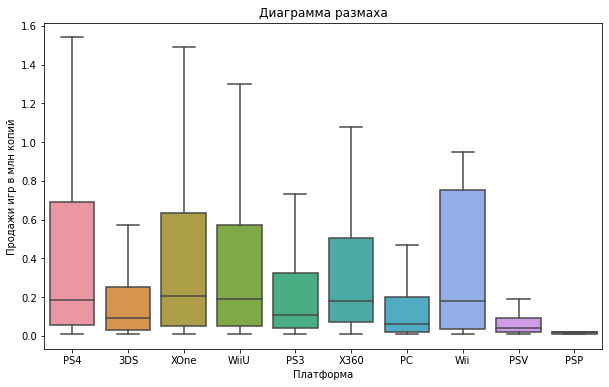

In [35]:
# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью sns.boxplot построим диаграмму размаха "Ящик с Усами" и выключим отображение выбросов
sns.boxplot(x='platform', y='total_sales', data=actual_dataset, showfliers = False)

# выбираем оформление графика
plt.xlabel('Платформа');
plt.ylabel('Продажи игр в млн копий');
plt.title('Диаграмма размаха');

Для наглядности выведем числовые параметры продаж игр по каждой платформе.

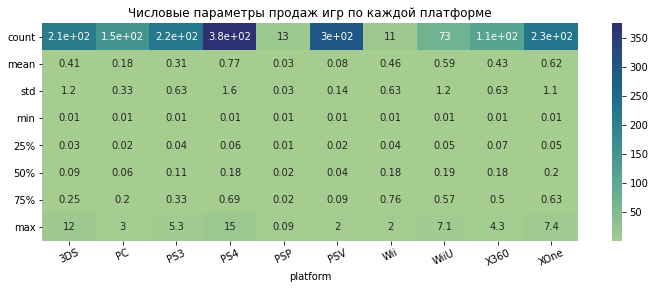

In [36]:
# строим сводную таблицу по играм разделенных по платформам со значениями общих продаж
# выводим числовые характеристики по каждой платформе
# округляем все это до двух значений после запятой
genre_describe = round(
    actual_dataset.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').describe(), 2)
# выбираем размер графика
plt.figure(figsize=(12,4))
# с помощью sns.heatmap выведем числовые показатели продаж игр по каждому жанру
sns.heatmap(genre_describe, annot=True, cmap='crest');
# выбираем оформление графика
plt.title('Числовые параметры продаж игр по каждой платформе')
plt.xticks(rotation=25);

На данных графиках мы видим следующее:
 
 - на платформах нового поколения: PlayStation 4, Xbox One и WiiU мы видим, что медианное значение продаж игр смещено к нижней границы диапазона 25 и 75 квантиля, нижний ус очень короткий, а верхний наоборот очень длинный. Это все говорит нам о том, что на этих платформах присутствует большое количество "бестцеллеров" (очень популярных игр, с огромным количеством продаж), которые и приводят к данным искажениям на графике.
 
 
 
 - медианное значение продаж на платформе PS4 составляет 180 тыс, а диапазон продаж типичной игры на этой платформе составляет от 60 до 690 тыс проданных копий
 
 - медианное значение продаж на платформе XOne составляет 200 тыс, а диапазон продаж типичной игры на этой платформе составляет от 50 до 630 тыс проданных копий
 
 - медианное значение продаж на платформе WiiU составляет 190 тыс, а диапазон продаж типичной игры на этой платформе составляет от 50 до 570 тыс проданных копий
 


 - на платформах старого поколения: PlayStation 3, Xbox 360 и Wii мы видим похожую картину. Медианное значение продаж игр смещено к нижней границы диапазона 25 и 75 квантиля, нижний ус очень короткий, а верхний наоборот очень длинный, хотя нужно отметить отдельно платформу Wii - там ситуация более сбалансированная чем, на PS3 и Xbox 360. Это все говорит нам о том, что на этих платформах также присутствует большое количество "бестцеллеров" (очень популярных игр, с огромным количеством продаж), правда в случае с Wii таких игр будет меньше, чем в двух других.



 - медианное значение продаж на платформе PS3 составляет 110 тыс, а диапазон продаж типичной игры на этой платформе составляет от 40 до 330 тыс проданных копий
 
 - медианное значение продаж на платформе X360 составляет 180 тыс, а диапазон продаж типичной игры на этой платформе составляет от 70 до 500 тыс проданных копий
 
 - медианное значение продаж на платформе Wii составляет 180 тыс, а диапазон продаж типичной игры на этой платформе составляет от 40 до 760 тыс проданных копий
 
 
 - на компьютерах аналогичная ситуация как и на предыдущих шести платформах, только показатели более скромные.
 


 - медианное значение продаж на PC составляет 60 тыс, а диапазон продаж типичной игры на этой платформе составляет от 20 до 200 тыс проданных копий
 
 
 
 - портативные приставки от Sony: PSP и PSV имеют очень скромные продажи относительно всех остальных платформ, а вот портативная приставка Nintendo 3DS имеет очень даже неплохие продажи по меркам портативных консолей и заслуживает отдельного внимания.
 
 
 - медианное значение продаж на платформе 3DS составляет 90 тыс, а диапазон продаж типичной игры на этой платформе составляет от 30 до 250 тыс проданных копий
 

#### Исследование влияния оценок критиков и пользователей на продажи игр ####

Посмотрим как влияют отзывы критиков и пользователей на продажи игр. Сначала рассмотрим это на самой популярной платформе, а потом сравним полученные результаты с остальными платформами.

Построим диаграмму рассеяния и посмотрим есть ли взаимосвязь между оценками критиков и продажами на платформе PS4.

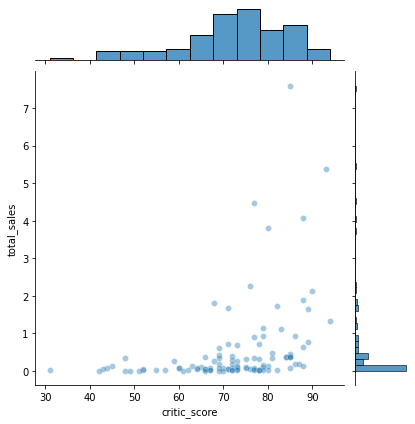

In [37]:
# с помощью sns.jointplot построим диаграмму рассеяния
# отобразим график в стандартном цвете
with sns.color_palette("tab10"):
    sns.jointplot(x='critic_score', y='total_sales', 
              # отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
              data=actual_data.query('critic_score > 0 and platform == "PS4"'),
              # поставим прозрачность и вид диаграммы
              alpha=0.4, kind='scatter');

По графику видно, что такая взаимосвязь присутствует, но она достаточно слабая. Популярные игры действительно имеют высокие оценки (70 баллов и выше), но также встречаются игры, которые высоко оценивались критиками и имели при этом очень маленькие продажи.

Построим диаграмму рассеяния и посмотрим есть ли взаимосвязь между оценками пользователей и продажами на платформе PS4.

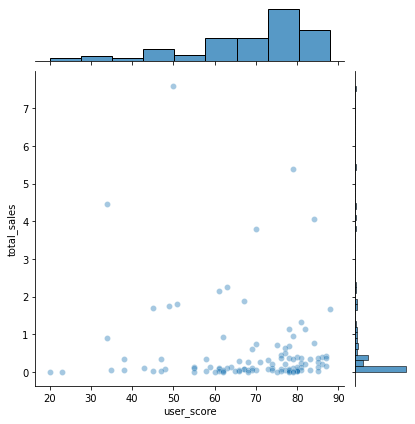

In [38]:
# с помощью sns.jointplot построим диаграмму рассеяния
# отобразим график в стандартном цвете
with sns.color_palette("tab10"):
    sns.jointplot(x='user_score', y='total_sales',
              # отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
              data=actual_data.query('user_score > 0 and platform == "PS4"'),
              # поставим прозрачность и вид диаграммы
              alpha=0.4, kind='scatter');

По этому графику взаимосвязи между оценками пользователей и продажами обнаружить не удалось. Мы видим популярные игры, которые имеют достаточно низкие оценки пользователей, а также игры, высоко оцененные пользователями, но с низкими продажами.

Посмотрим на кореляцию между столбцами `critic_score`, `user_score` и `total_sales` на платформе PS4.

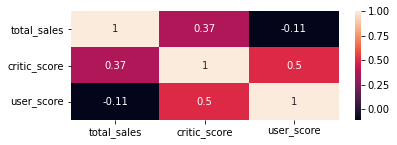

In [39]:
# выбираем размер графика
plt.figure(figsize=(6,2))
# с помощью sns.heatmap выведем кореляцию
# отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
# выберем нужные столбцы и выведем их кореляцию
sns.heatmap(actual_data.query(
    'platform == "PS4" and critic_score > 0 and user_score > 0')[['total_sales', 'critic_score', 'user_score']].corr(), 
            annot=True);

Исходя из этой информации мы видим следующее:

 - кореляция между столбцами `critic_score` и `total_sales` находится на уровне 0.37, т.е. она присутствует, но достаточно слабая. Это означает, что пользователи PS4 хоть и немного, но все же прислушиваются к мнению критиков.
 - кореляция между столбцами `user_score` и `total_sales` отсутствует и даже слегка отрицательная (- 0.11). Это в свою очередь говорит нам о том, что пользователи PS4 не очень-то и доверяют друг другу в плане оценки той или иной игры.

Теперь посмотрим как с этим обстоят дела на остальных платформах. Выведем те же самые графики, но уже для всех остальных платформ.

Построим диаграмму рассеяния и посмотрим есть ли взаимосвязь между оценками критиков и продажами на остальных платформах.

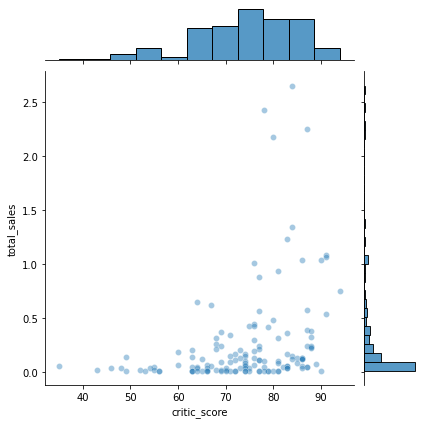

In [40]:
# с помощью sns.jointplot построим диаграмму рассеяния
# отобразим график в стандартном цвете
with sns.color_palette("tab10"):
    sns.jointplot(x='critic_score', y='total_sales', 
              # отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
              data=actual_data.query('critic_score > 0 and platform != "PS4"'),
              # поставим прозрачность и вид диаграммы
              alpha=0.4, kind='scatter');

Здесь мы также видим наличие слабой взаимосвязи. Хорошие оценки критиков способствуют хорошим продажам. Но как и в случае с PS4 далеко не всегда высокие оценки критиков являются залогом успешных продаж.

Построим диаграмму рассеяния и посмотрим есть ли взаимосвязь между оценками пользователей и продажами на остальных платформах.

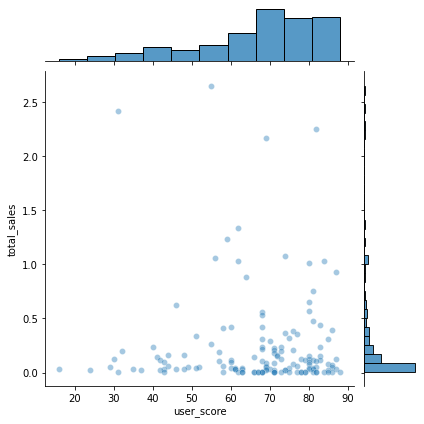

In [41]:
# с помощью sns.jointplot построим диаграмму рассеяния
# отобразим график в стандартном цвете
with sns.color_palette("tab10"):
    sns.jointplot(x='user_score', y='total_sales', 
              # отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
              data=actual_data.query('user_score > 0 and platform != "PS4"'),
              # поставим прозрачность и вид диаграммы
              alpha=0.4, kind='scatter');

Такая взаимосвязь как и в случае с PS4 осутствует.

Посмотрим на кореляцию между столбцами `critic_score`, `user_score` и `total_sales` на остальных платформах.

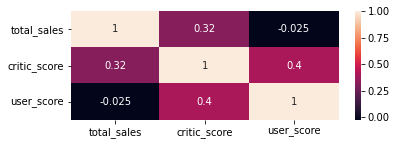

In [42]:
# выбираем размер графика
plt.figure(figsize=(6,2))
# с помощью sns.heatmap выведем кореляцию
# отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
# выберем нужные столбцы и выведем их кореляцию
sns.heatmap(actual_data.query(
    'platform != "PS4" and critic_score > 0 and user_score > 0')[['total_sales', 'critic_score', 'user_score']].corr(), 
            annot=True);

На этом графике мы видим похожую на график кореляции для PS4 ситуацию:
 - кореляция между столбцами `critic_score` и `total_sales` находится на уровне 0.34
 - кореляция между столбцами `user_score` и `critic_score` имеет практически нулевое значение 

Здесь актуальны все те же выводы, что и для PS4, т.е. на остальных платформах, мнение критиков тоже имеет небольшое влияние на продажи игр, чего не скажешь о мнении пользователей, которое не оказывает на продажи никакого влияния.

На всякий случай выведем еще графики кореляций по каждой из остальных платформ. Для этого создадим функцию, которая на вход будет принимать название платформы, а на выходе строить график кореляции по нужной платформе.

In [43]:
# создаем функцию corr_on_platform
def corr_on_platform (platform):
    # выбираем из датасета данные по нужной платформе и сохраняем в переменную.
    platform_data = actual_data[actual_data['platform'] == platform]
    # устанавливаем размер графика
    plt.figure(figsize=(6,2))
    # выводим кореляцию с помощью sns.heatmap()
    # отсортируем данные по платформе и уберем значения -1 (значение для пропусков в числовых столбцах)
    # выберем нужные столбцы и выведем их кореляцию
    sns.heatmap(platform_data.query(
    'critic_score > 0 and user_score > 0')[['total_sales', 'critic_score', 'user_score']].corr(), 
            annot=True);

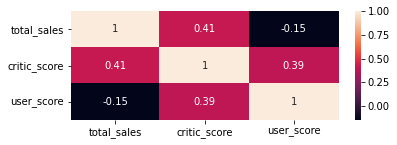

In [44]:
# с помощью функции выведем кореляцию для платформы
corr_on_platform('XOne')

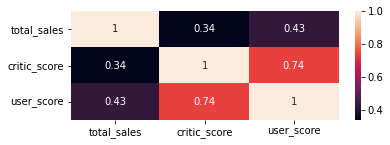

In [45]:
# с помощью функции выведем кореляцию для платформы
corr_on_platform('3DS')

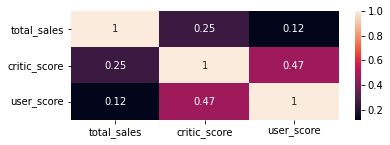

In [46]:
# с помощью функции выведем кореляцию для платформы
corr_on_platform('PC')

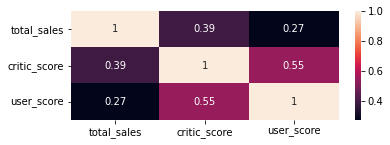

In [47]:
# с помощью функции выведем кореляцию для платформы
corr_on_platform('WiiU')

Из этих данных можно сделать следующие дополнения к основным выводам:
 - кореляция между оценками критиков и продажами на платформе XOne самая высокая из всех - 0.41. Пользователи XOne прислушиваются к мению критиков больше всего.
 - кореляция между оценками критиков и продажами на платформе PC самая низкая из всех - 0.25. Пользователи PC наоборот, очень неохотно слушают мнение критиков.
 - также из интересного стоит отметить пользователей приставок Nintendo. Они прислушиваются к мнению друг друга при выборе игр больше всех остальных. Особенно это касается платформы 3DS. Там кореляция между оценками пользователей и продажами находится на значении 0.43.

#### Исследование популярности игровых жанров ####

Определим какие жанры имеют наибольшую популярность среди остальных. Для этого построим график суммарных продаж по каждому жанру.

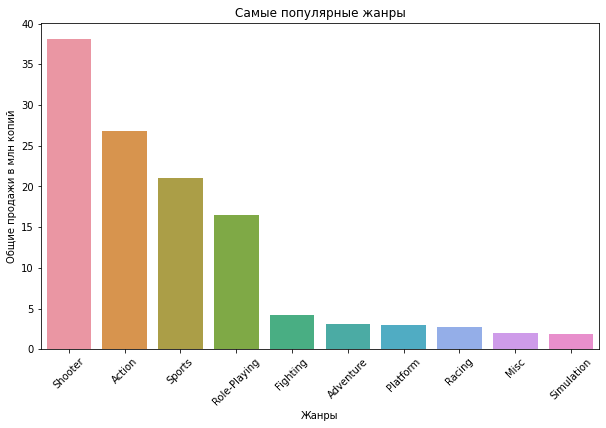

In [48]:
# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью метода  sns.barplot строим график самых популярных жанров
sns.barplot(
    x = 'genre', 
    y = "total_sales", 
    # группируем датасет по жанрам, сбрасываем индекс, считаем общую сумму продаж в total_sales по каждой платформе
    # отсортировываем это все по убыванию и выводим 10 самых популярных жанров
    data = actual_data.groupby(
        'genre', as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False).head(10)
)
# выбираем оформление графика
plt.xlabel('Жанры');
plt.ylabel('Общие продажи в млн копий');
plt.title('Самые популярные жанры');
plt.xticks(rotation=45);

Исходя из информации на графике выделим следующие жанры по их популярности:
 - на первом месте находится жанр "Shooter" с результатом в 38 млн копий
 - на втором месте - жанр "Action" с результатом в 26 млн копий
 - на третьем месте - жанр "Sports" с результатом в 20 млн копий
 - на четвертом месте - жанр "Role-Playing" с результатом в 16 млн копий
 - на пятом месте с сильным отставанием от остальных находится жанр "Fighting" с результатом в 4 млн копий
 - остальные жанры можно назвать "низшевыми", т.к. они имеют очень маленькие продажи
 

Далее посмотрим как продаются игры самых популярных жанров. Для этого построим график ящик с усами с разбивкой по жанрам.

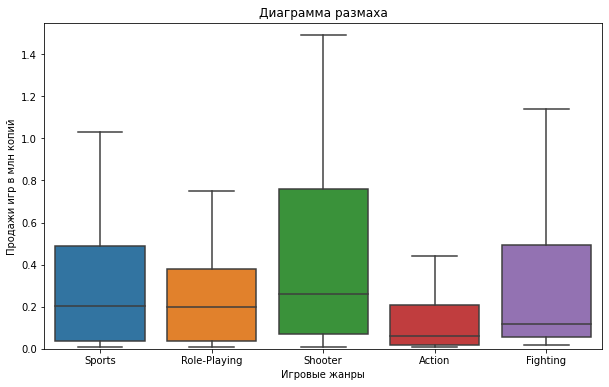

In [49]:
# создаем переменную с самыми популярными жанрами
most_popular_genres = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Fighting']

# выбираем размер графика
plt.figure(figsize=(10,6))

# с помощью sns.boxplot построим диаграмму размаха "Ящик с Усами" и выключим отображение выбросов
# отобразим график в стандартном цвете
# отберем данные по интересующим нас жанрам
with sns.color_palette("tab10"):
    sns.boxplot(x='genre', y='total_sales', data=actual_data.query('genre in @most_popular_genres'), showfliers = False)

# выбираем оформление графика
plt.xlabel('Игровые жанры')
plt.ylabel('Продажи игр в млн копий')
plt.title('Диаграмма размаха')
# установим диапазон по шкале Y
plt.ylim([0, 1.55]);

На данном графике мы видим следующее:


- медианное значение жанра "Shooter", лидирующего по числу проданных копий, находится в районе 500 тыс и смещено ближе к нижнему краю, что говорит нам о наличии большого количества сверх-популярных игр этого жанра, которые и дают это смещение. В целом можно отметить, что типичная игра этого жанра имеет очень хорошие продажи в диапазоне от 80 тыс до 2.2 млн копий (25 и 75 квантили).


- медианное значение жанра "Action", второго по числу проданных копий, находится в районе 70 тыс и является самым низким из всей пятерки популярных жанров. Также медиана сильно смещена к нижнему краю, а диапазон продаж типичной игры этого жанра находится в районе от 30 до 280 тыс копий, что также является самым низким из всей пятерки. Из этого можно сделать вывод, что занимаемое второе место по числу проданных копий это заслуга не столько жанра, сколько отдельных сверх-популярных игр, представленных в этом жанре.


- медианное значение жанра "Sports" имеет показатель 400 тыс и имеет небольшое смещение к нижнему краю, диапазон продаж типичной игры это жанра составляет от 70 до 980 тыс копий, что в целом очень даже неплохо.


- медианное значение жанра "Role-Playing" составляет 200 тыс проданных копий и находится практически в середине диапазона от 80 до 380 тыс (25 и 75 квантили). Из этого можно сделать вывод, что большое количество проданных копий в этом жанре полностью заслуга самого жанра, а не отдельных хитовых игр, как в случае с жанром "Action".


- медианное значение жанра "Fighting" находится в районе 150 тыс и сильно смещено к нижнему краю, а диапазон продаж составляет от 80 до 950 тыс, что является неплохим значением и сопоставимо с диапазоном продаж игр в жанре "Sports". Хотя нужно отметить, что заслуга в этом больше отдельных игр, чем самого жанра.


Для наглядности и для лучшего понимания вышепредставленного графика можно еще вывести числовые показатели продаж игр по каждому жанру.

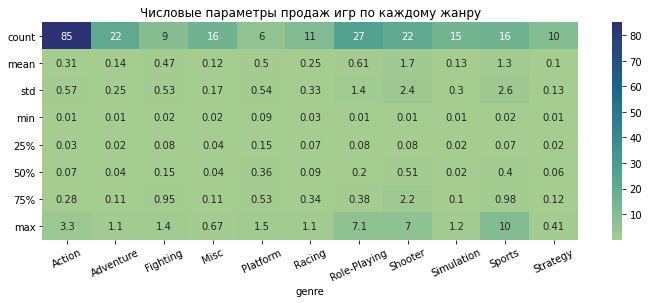

In [50]:
# строим сводную таблицу по играм разделенных по жанрам со значениями общих продаж
# выводим числовые характеристики по каждому жанру
# округляем все это до двух значений после запятой
genre_describe = round(
    actual_data.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').describe(), 2)
# выбираем размер графика
plt.figure(figsize=(12,4))
# с помощью sns.heatmap выведем числовые показатели продаж игр по каждому жанру
sns.heatmap(genre_describe, annot=True, cmap='crest');
# выбираем оформление графика
plt.title('Числовые параметры продаж игр по каждому жанру')
plt.xticks(rotation=25);

**Итог данного этапа:**

На данном этапе было сделано следующее:
- выполненно исследование по количеству проданных игр взависимости от года за все время
- определен актуальный период необходимый для дальнейших исследований
- выполненно исследование по определению самых популярных платформ за все время
- выполненно исследование по определению жизненного цикла самых популярных платформ за все время
- определены актуальные платформы, а также на каком этапе жизненного цикла они находятся
- был создан датасет с актуальной информацией необходимой для дальнейших исследований
- были изучены продажи игр по каждой из актуальных платформ
- была изучена взаимосвязь между продажами игр и отзывами критиков и пользователей
- были изучены продажи игр по каждому жанру

### Составление портрета пользователя по каждому региону ###

Определим для пользователей каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

Так как нам предстоит вывести похожие графики для каждого региона, то можно для этих целей создать функцию, которая на вход будет принимать название региона, а на выходе строить три графика:
 - топ 5 популярных платформ для каждого региона
 - топ 5 популярных жанров для каждого региона
 - топ 5 самых популярных рейтингов в каждом регионе

In [51]:
# создаем функцию region_user_features
def region_user_features (region):
    
    # установим размер графика 
    plt.figure(figsize=(14,6))
    # используем plt.subplot, чтобы вывести три графика в одной строке
    # ставим значение 1 - количество линий, 3 - количество графиков на линии, 1 - первый график
    plt.subplot(1,3,1)   
    # используем plt.pie, чтобы вывести топ 5 платформ в регионе
    plt.pie(
        # группируем actual_data по платформе, суммируем продажи в регионе по каждой платформе
        # сортируем по убыванию и выводим 5 первых значений
        actual_dataset.groupby('platform')[region].sum().sort_values(ascending=False).head(), 
        # выводим отображение названий платформ
        labels=actual_dataset.groupby('platform')[region].sum().sort_values(ascending=False).head().index,
        # выводим долю каждой платформы в регионе, выраженную в процентах
        autopct='%.0f%%',
        # разделяем график на части
        explode = [0.04, 0.04, 0.06, 0.06, 0.06]);
    # выводим название первого графика
    plt.title('Платформы')
    # используем plt.subplot, чтобы вывести три графика в одной строке
    # ставим значение 1 - количество линий, 3 - количество графиков на линии, 2 - второй график
    plt.subplot(1,3,2)
    # используем plt.pie, чтобы вывести топ 5 жанров в регионе
    plt.pie(
        # группируем actual_data по жанру, суммируем продажи в регионе по каждому жанру 
        # сортируем по убыванию и выводим 5 первых значений
        actual_dataset.groupby('genre')[region].sum().sort_values(ascending=False).head(),
        # выводим отображение названий жанров
        labels=actual_dataset.groupby('genre')[region].sum().sort_values(ascending=False).head().index,
        # выводим долю каждого жанра в регионе, выраженную в процентах
        autopct='%.0f%%',
        # разделяем график на части
        explode = [0.04, 0.04, 0.06, 0.06, 0.06]);
    # выводим название второго графика
    plt.title('Жанры')
    # используем plt.subplot, чтобы вывести три графика в одной строке
    # ставим значение 1 - количество линий, 3 - количество графиков на линии, 3 - третий график
    plt.subplot(1,3,3)
    # используем plt.pie, чтобы вывести 5 самых популярных рейтингов в регионе
    plt.pie(
        # группируем actual_data по рейтингу, суммируем продажи в регионе по каждому рейтингу 
        # сортируем по убыванию и выводим 5 первых значений
        actual_dataset.groupby('rating')[region].sum().sort_values(ascending=False).head(),
        # выводим отображение названий рейтингов
        labels=actual_dataset.groupby('rating')[region].sum().sort_values(ascending=False).head().index,
        # выводим долю каждого рейтинга в регионе, выраженную в процентах
        autopct='%.0f%%',
        # разделяем график на части
        explode = [0.04, 0.04, 0.06, 0.06, 0.06]);
    # выводим название третьего графика
    plt.title('Рейтинг')
    plt.show()

Теперь с помощью этой функции посмотрим на предпочтения пользователей каждого из трех регионов (NA, JP, EU).

#### Портрет пользователя в Американском регионе ####

Выведем информацию о наиболее популярных платформах, жанрах и рейтингах характерных для жителей Североамериканского Региона.

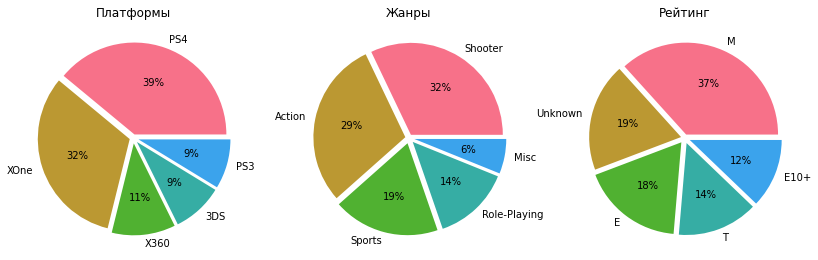

In [52]:
# применим функцию region_user_features
region_user_features('na_sales')

По данным из этих графиков можно сделать следующие выводы о пользователях Северной Америки:


- североамериканцы предпочитают PS4 в 39% всех случаев, на втором и на третьем месте платформы от Microsoft: XOne с результатом в 32% и X360 с результатом в 11%, на четвертом месте портативная платформа от Nintendo: 3DS с результатом в 9% и и замыкает пятерку лидеров PS3 с результатом также в 9%.


- наболее популярные жанры - "Shooter" (32%), "Action" (29%) и "Sports" (19%), они покрывают 80% жанровых предпочтений в регионе.


- больше всего игр в данном регионе относится к рейтину "M" (37%), "E" (18%) и "T" (14%).

#### Портрет пользователя в Японии ####

Выведем информацию о наиболее популярных платформах, жанрах и рейтингах характерных для жителей Японии.

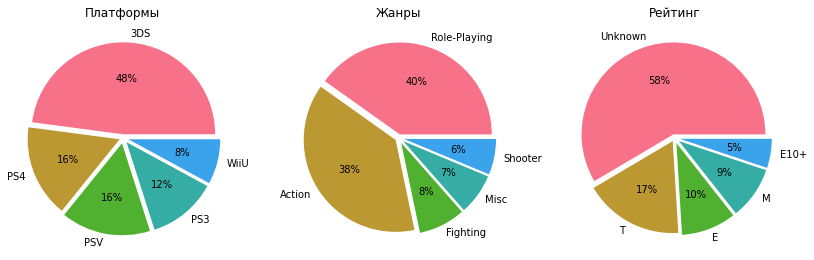

In [53]:
# применим функцию region_user_features
region_user_features('jp_sales')

По данным из этих графиков можно сделать следующие выводы о пользователях Японии:

- японцы оказались очень патриотичными в плане выбора платформ, т.к. все места занимают японские приставки: Nintendo 3DS (48%), PS4 (16%), PSV (16%), PS3 (12%) и Nintendo WiiU (8%), остальные платформы, такие как XOne, X360, PC и др. в этом регионе скорее экзотика


- наболее популярные жанры - "Role-Playing" (40%) и "Action" (38%), они занимают 78% жанровых предпочтений в регионе.


- больше всего игр в регионе относится к рейтину "T" (17%), E (10%) и "M" (9%), также мы видим на первом месте "Unknown" это те игры, для которых мы не смогли определить рейтинг.

#### Портрет пользователя в Европейском регионе ####

Выведем информацию о наиболее популярных платформах, жанрах и рейтингах характерных для жителей Европейского Региона.

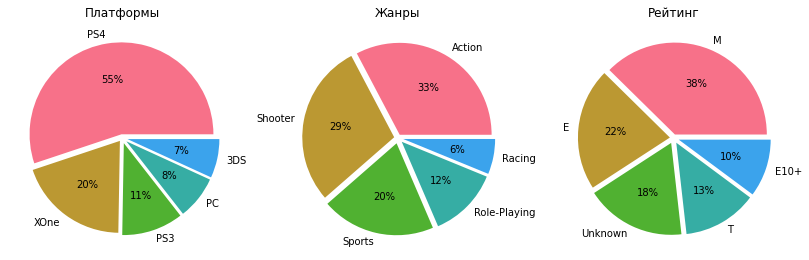

In [54]:
# применим функцию region_user_features
region_user_features('eu_sales')

По данным из этих графиков можно сделать следующие выводы о пользователях Европы:


- европейцы в подавляющем большинстве (55%) предпочитают играть на PS4, следом идет XOne с результатом в 20%, на третьем месте PS3 с результатом в 11%, компьютер предпочитают лишь 8% пользователей, а вот приставки Nintendo в Европе не очень любят, платформа 3DS занимает последнее место (7%), а WiiU и Wii и вовсе не попали в рейтинг.


- наболее популярные жанры - "Action" (33%), "Shooter" (29%), и "Sports" (20%), они покрывают 82% жанровых предпочтений в регионе.


- больше всего игр в данном регионе относится к рейтину "M" (38%), "E" (22%) и "T" (13%).

**Итоги данного этапа:**

На данном этапе было сделано следующее:
 - определены предпочтения в платформах, жанрах и рейтингах жителей Японии
 - определены предпочтения в платформах, жанрах и рейтингах жителей Европейского региона
 - определены предпочтения в платформах, жанрах и рейтингах жителей Североамериканского Региона
 
В целом можно отметить что предпочтения жителей Североамериканского и Европейского региона очень похожи. Они в большинстве случаев предпочитают играть на новых версиях консолей, таких как PS4 и XOne, любят одни и те же жанры, такие как "Shooter", "Action" и "Sports", а также у них популярны те же самые рейтинги и в том же порядке: "M", "E" и "T". А вот предпочтения жителей Японии довольно сильно от них отличаются. Самая популярная платформа у них это портативная консоль Nintendo 3DS, PS4 c большим отставанием лишь вторая, а XOne даже не попала в рейтинг. Также и с жанрами у них на первом месте идет Role-Playing, который не очень популярен в Америке и Европе.

### Проверка гипотез ###

На данном этапе нам необходимо проверить две следующие гипотезы:

- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"


- "Средние пользовательские рейтинги жанров Action и Sports разные."

#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" ####

Найдем средние пользовательские рейтинги для платформ Xbox One и PC.

In [55]:
print("Cредние пользовательские рейтинги для платформы Xbox One составляют:", 
      round(actual_data.query('platform == "XOne"')['user_score'].mean(), 2))

Cредние пользовательские рейтинги для платформы Xbox One составляют: 56.95


In [56]:
print("Cредние пользовательские рейтинги для платформы PC составляют:", 
      round(actual_data.query('platform == "PC"')['user_score'].mean(), 2))

Cредние пользовательские рейтинги для платформы PC составляют: 52.31


Сформулируем нулевую гипотезу **H₀**:
- "Средние пользовательские рейтинги платформ Xbox One и PC равны"

Сформулируем альтернативную гипотезу **H₁**:
- "Средние пользовательские рейтинги платформ Xbox One и PC не равны"

Для проверки средних двух совокупностей используем критерий Стьюдента `st.ttest_ind`.

In [57]:
# сформируем две выборки: одну по XBOX One, а другую по PC

xone_user_score = actual_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_user_score = actual_data.query('platform == "PC" and user_score > 0')['user_score']

# выберем базовый критический уровень значимости
alpha = .05

# проведем ти-тест Стьюдента
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

# выведем значение P-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.18715419911649459
Не получилось отвергнуть нулевую гипотезу


Результат проверки: 
- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". У нас нет достаточно оснований, чтобы отвергнуть эту гипотезу.

#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные. ####

Найдем средние пользовательские рейтинги для жанров Action и Sports.

In [58]:
print("Cредние пользовательские рейтинги для жанра Action составляют:", 
      round(actual_data.query('genre == "Action"')['user_score'].mean(), 2))

Cредние пользовательские рейтинги для жанра Action составляют: 42.68


In [59]:
print("Cредние пользовательские рейтинги для жанра Sports составляют:", 
      round(actual_data.query('genre == "Sports"')['user_score'].mean(), 2))

Cредние пользовательские рейтинги для жанра Sports составляют: 55.12


Сформулируем нулевую гипотезу **H₀**:
- "Средние пользовательские рейтинги жанров Action и Sports равны"

Сформулируем альтернативную гипотезу **H₁**:
- "Средние пользовательские рейтинги жанров Action и Sports не равны"

Для проверки средних двух совокупностей используем критерий Стьюдента `st.ttest_ind`.

In [60]:
# сформируем две выборки: одну по Action, а другую по Sports

action_user_score = actual_data.query('genre == "Action" and user_score > 0')['user_score']
sports_user_score = actual_data.query('genre == "Sports" and user_score > 0')['user_score']

# выберем базовый критический уровень значимости
alpha = .05

# проведем ти-тест Стьюдента
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

# выведем значение P-value
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.02768763999021354
Отвергаем нулевую гипотезу


Результат проверки: 
- "Средние пользовательские рейтинги жанров Action и Sports разные. У нас нет достаточно оснований, чтобы отвергнуть эту гипотезу. (точнее мы отвергли гипотезу - "Средние пользовательские рейтинги жанров Action и Sports равны", тем самым приняли альтернативную гипотезу - "Средние пользовательские рейтинги жанров Action и Sports не равны")

**Итог данного этапа:**

На даннном этапе были проверены и приняты две следующие гипотезы:

- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

- "Средние пользовательские рейтинги жанров Action и Sports разные."


### Общий вывод по проекту ###

Итак, мы провели все необходимые исследования и теперь можно подвести итог всей проделанной работе.


На первом этапе мы загрузили и провели визуальный осмотр датасета, а также изучили информацию о нем, где выявили пропуски и неподходящий формат данных в нескольких столбцах.


На втором этапе мы произвели предобработку данных: удалили пропуски и заменили неподходящий тип данных. Мы выяснили, что пропуски в столбцах `critic_score`, `user_score` и `rating` в большинстве случаев присутствовали для старых игр, поэтому предположили, что причиной может быть отсутствие данной информации для этих игр. Еще на данном этапе мы выяснили значение абривиатуры "tbd" в столбце `user_score` и расшифровали каждое значение рейтинга от организации ESRB. Также мы посчитали суммарные продажи по всем регионам и добавили в новый столбец датасета.


Теперь перейдем непосредственно к самому исследованию. В рамках данного исследования было выясненно следующее:


Количество выпускаемых игр постепенно росло начиная с 1980-ых по 2010-ые года, после которого начался существенный спад. Причинами такого спада могли быть мировой финансовый кризис, активное развитие мобильного гейминга, а также увеличение материальных и временных затрат на производство одной игры.


Самыми популярными платформами за все время оказались: PS2, Xbox360, PS3, Nintendo Wii и Nintendo DS.


Жизненный цикл популярных платформ обычно составляет 6-10 лет с пиком популярности через 3-5 лет после выхода.


Самыми популярными платформами за последний год оказались: PS4, Xbox One, PC, Nintendo WiiU и Nintendo 3DS.


На основе данной информации был определен наиболее актуальный период. Им оказался промежуток с 2014 по 2016 год, потому что в предыдущие годы происходила так называемая "смена поколений" игровых платформ, когда предшествующее поколение стремительно теряла свою долю рынка, а последующее наоборот занимало все более высокие позиции в суммарных продажах игр. 


На основе данной информации также были определены наиболее актуальные платформы: PS4, Xbox One, PC, Nintendo WiiU и Nintendo 3DS. Эти платформы пришли на смену своим устаревшим аналогам: PS3, Xbox360, Nintendo Wii и Nintendo DS. Особенное внимание стоит уделить платформам PS4 и Xbox One. Они являются наиболее перспективными из всей пятерки в плане роста популярности, т.к. вышли совсем недавно и еще не достигли своего пика.


При исследовании влияния оценок на продажи игр было обнаружено, что оценки критиков действительно влияют на продажи игр причем на всех платформах, а вот оценки пользователей не оказывают особого влияния на продажи, за исключением платформ от Nintendo.


На основе исследования продаж игр по жанрам было выявлено пять наиболее успешных из них. Ими оказались такие жанры как Shooter, Action, Sports, Role-Playing и Fighting. Лучшими из них оказались Shooter, Sports и Role-Playing.


Еще были исследованы предпочтения пользователей в каждом из трех регионов: NA, EU, JP и выясненно следующее:

- жители NA предпочитают играть в основном на PS4 и XOne, популярные жанры - Shooter, Action и Sports, а рейтинги - M, E, T.

- жители EU предпочитают играть в основном на PS4 и немного на XOne, популярные жанры - Shooter, Sports и Action, а рейтинги M, E, T.

- жители JP предпочитают играть в основном на своих платформах, популярные жанры - Role-Playing, Action и Shooter, а рейтинги T, M, E.


Ну и в конце были проверены и приняты две следующие гипотезы (т.к. у нас не было достаточно оснований их отвергнуть):

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные."
